<a href="https://colab.research.google.com/github/vskedrin/.tmux/blob/master/02%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%D0%9F%D0%A0%D0%B2%D0%9C%D0%9A%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

# Задача 2. Принятие решений в многокритериальных задачах


## Условие задания

Построить множество оценок. Найти идеальную точку.

$$
f_1(x) = x_1 + x_2 \to \max,
$$
$$
f_2(x) = x_1 - x_2 \to \max,
$$
$$
- 4x_1 + x_2 \leq 1,
$$
$$
x_1 + x_2 \leq 10,
$$
$$
x_1 - x_2 \leq 2,
$$
$$
x_1  \geq 0,\,\,x_2  \geq 0,
$$

1) найти решение методом линейной свертки, коэффициенты свертки принять равными 1/m, m - число критериев;

2) найти решение методом минимизации отклонений, коэффициенты свертки принять равными 1/m, m - число критериев;

3) составить экстремальную задачу для применения метода идеальной точки, норма евклидова (решать задачу не требуется).


## Решение



### 1. Метод линейной свертки

1. Запишем коэффициенты свертки:

$$ c_1 = c_2 = \frac{1}{2} $$

2. Составим линейную комбинацию и получим задачу линейного программирования для $g(x)$

$$g(x)= \sum_{i=1}^2 {\frac{1}{2}f_i(x)} = x_1$$

В итоге:

$$g(x)= x_1 \to \max, \, x \in X $$

Решим данную задачу графически



3. Изобразим множество $X$ на графике

(0.0, 10.0)

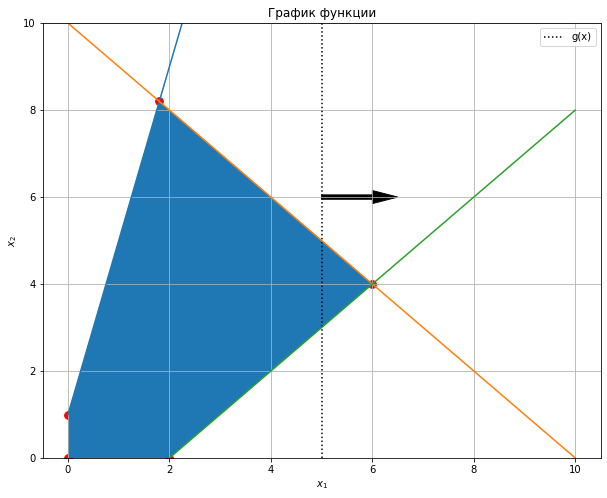

In [13]:
x1, x2 = sp.symbols('x1 x2')

x2_1=1+4*x1
x2_2=10-x1
x2_3=x1-2

x1_data = [0, 0, float(sp.solve(x2_1-x2_2,x1)[0]), float(sp.solve(x2_2-x2_3,x1)[0]), float(sp.solve(x2_3,x1)[0])]
x2_data = [0, 1, float(x2_1.subs(x1,sp.solve(x2_1-x2_2,x1)[0])),float(x2_2.subs(x1,sp.solve(x2_2-x2_3,x1)[0])), 0]

plt.figure(figsize=(10, 8))

xx1=np.linspace(0,10,10)
yy1=np.linspace(0,10,10)
xx2_1=1+4*xx1
xx2_2=10-xx1
xx2_3=xx1-2

g_x = 5+0*yy1


plt.plot(g_x, yy1, "k", linestyle = ':', label="g(x)")
plt.arrow(5, 6, 1, 0,
         width = 0.1,
         head_length = 0.5, color="black")

plt.title("График функции")
plt.xlabel('$x_1$')
plt.ylabel("$x_2$")
plt.grid()
plt.plot(xx1, xx2_1)
plt.plot(xx1, xx2_2)
plt.plot(xx1, xx2_3)
plt.fill(x1_data, x2_data)
plt.scatter(x1_data, x2_data, c='r', marker='o', s=60)
plt.legend()
plt.ylim((0,10))

Таким образом:

 $x^*= \arg_{x \in X} \max g(x)= (6,4)$

Точка $x^*$ - точка максимума, где оба критерия $f_1$ и $f_2$ достигают макимальных значений $f^*= (10,2) \in Y$


### 2. Метод минимизации отклонений

Найдем наибольшее и наименьшее значения криетериев $f_1$ и $f_2$ на множестве X.
Получим 4-ре задачи:

  1. $f_1 \to \max, \, x \in X$
  2. $f_2 \to \max, \, x \in X$
  3. $f_1 \to \min, \, x \in X$
  4. $f_2 \to \min, \, x \in X$

решим их графически

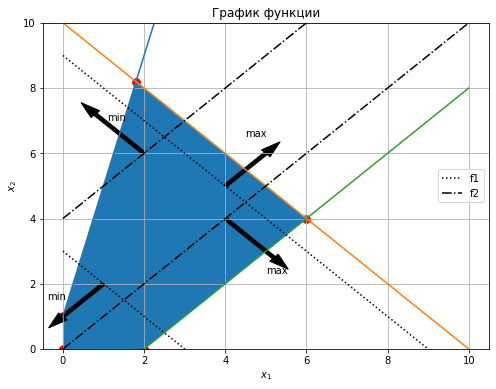

In [75]:
x1, x2 = sp.symbols('x1 x2')

x2_1=1+4*x1
x2_2=10-x1
x2_3=x1-2

x1_data = [0, 0, float(sp.solve(x2_1-x2_2,x1)[0]), float(sp.solve(x2_2-x2_3,x1)[0]), float(sp.solve(x2_3,x1)[0])]
x2_data = [0, 1, float(x2_1.subs(x1,sp.solve(x2_1-x2_2,x1)[0])),float(x2_2.subs(x1,sp.solve(x2_2-x2_3,x1)[0])), 0]

plt.figure(figsize=(8, 6))

xx1=np.linspace(0,10,10)
xx2_1=1+4*xx1
xx2_2=10-xx1
xx2_3=xx1-2

f1 = -xx1+9

f1_min = -xx1+3

f2 = xx1

f2_min = xx1+4

plt.title("График функции")
plt.xlabel('$x_1$')
plt.ylabel("$x_2$")
plt.grid()
plt.plot(xx1, xx2_1)
plt.plot(xx1, xx2_2)
plt.plot(xx1, xx2_3)

plt.plot(xx1, f1, "k", linestyle = ':', label="f1")
plt.plot(xx1, f2, "k", linestyle = '-.', label="f2")

plt.plot(xx1, f1_min, "k", linestyle = ':')
plt.plot(xx1, f2_min, "k", linestyle = '-.')

plt.arrow(4, 5, 1, 1,width = 0.1,head_length = 0.5, color="black")
plt.text(4.5, 6.5, "max")
plt.arrow(1, 2, -1, -1,width = 0.1,head_length = 0.5, color="black")
plt.text(-0.4, 1.5, "min")

plt.arrow(4, 4, 1.2, -1.2,width = 0.1,head_length = 0.5, color="black")
plt.text(5, 2.3, "max")
plt.arrow(2, 6, -1.2, 1.2,width = 0.1,head_length = 0.5, color="black")
plt.text(1.1, 7, "min")

plt.fill(x1_data, x2_data)
plt.scatter(x1_data, x2_data, c='r', marker='o', s=60)
plt.ylim((0,10))
plt.legend()






1. $ 
\arg_{x \in X} \max f_1 = \left\{x_2 = 10-x_1, \, x_1 \in \left[ \frac{9}{5},6 \right]\right\}, 
$, $
\max f_1 = 10
$

2. $
\arg_{x \in X} \max f_2 = \left\{x_2 = x_1-2, \, x_1 \in \left[ 2,6 \right]\right\}, 
$, $
\max f_2 = 2
$

3. $ \arg_{x \in X} \min f_1 = \hat x_1 = (0, 0) $, $\min f_1 = 0$

4. $ \arg_{x \in X} \min f_2 = \hat x_3 = (9/5, 41/5) $, $\min f_2 = -32/5$

То есть решения этиз задач достигается в угловых точках $\hat x_1 = (0, 0)$, $\hat x_3 =  (9/5, 41/5)$, $\hat x_4 =  (6, 4)$, $\hat x_5 =  (2, 0)$

Задача скалярной оптимизации определяется выражением


$$g(x)= \sum_{i=1}^2 {c_i\frac{\overline{f_i} - f_i(x)}{\overline{f_i} - \underline{f_i} }} \to \min$$

При $f_1=x_1+x_2$, $f_2=x_1+x_2$, $c_1 = c_2 = \frac{1}{2}$ и

$
\overline{f_1} = 10, \,\, \underline{f_1} = 0, \Rightarrow \overline{f_1} - \underline{f_1} =10
$

$
\overline{f_2} = 2, \,\, \underline{f_2} =−32/5, \Rightarrow \overline{f_2} - \underline{f_2} = 42/5
$

запишем задачу 
$$
g(x)= \frac{1}{2}\left( \frac{10 - (x_1+x_2)}{10}\right)+\frac{1}{2}\left( \frac{2 - (x_1-x_2)}{42/5}\right) \to min
$$



Упростим выражение

In [53]:
x1, x2 = sp.symbols('x1 x2')

g_x = sp.Rational(1,20)*(10-(x1+x2))+sp.Rational(5, 84)*(2-(x1-x2))
g_x

-23*x1/210 + x2/105 + 13/21

Таким образом
$$
g(x)= -\frac{23x_1}{210} + \frac{x_2}{105} + \frac{13}{21} \to min, \, x \in X
$$

Решим задачу графически

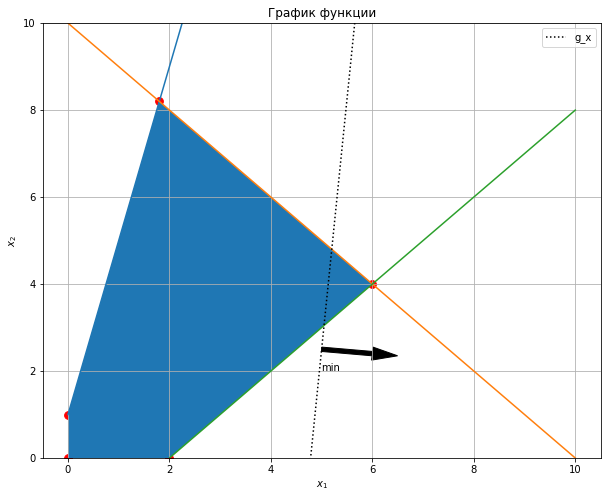

In [70]:
x1, x2 = sp.symbols('x1 x2')

x2_1=1+4*x1
x2_2=10-x1
x2_3=x1-2

x1_data = [0, 0, float(sp.solve(x2_1-x2_2,x1)[0]), float(sp.solve(x2_2-x2_3,x1)[0]), float(sp.solve(x2_3,x1)[0])]
x2_data = [0, 1, float(x2_1.subs(x1,sp.solve(x2_1-x2_2,x1)[0])),float(x2_2.subs(x1,sp.solve(x2_2-x2_3,x1)[0])), 0]

plt.figure(figsize=(10, 8))

xx1=np.linspace(0,10,10)
xx2_1=1+4*xx1
xx2_2=10-xx1
xx2_3=xx1-2

g_x = 1/2*(23*xx1 - 130)+10

# f1 = -xx1+9

# f1_min = -xx1+3

# f2 = xx1

# f2_min = xx1+4

plt.title("График функции")
plt.xlabel('$x_1$')
plt.ylabel("$x_2$")
plt.grid()
plt.plot(xx1, xx2_1)
plt.plot(xx1, xx2_2)
plt.plot(xx1, xx2_3)

plt.plot(xx1, g_x, "k", linestyle = ':', label="g_x")
# plt.plot(xx1, f2, "k", linestyle = '-.', label="f2")

# plt.plot(xx1, f1_min, "k", linestyle = ':')
# plt.plot(xx1, f2_min, "k", linestyle = '-.')

# plt.arrow(4, 5, 1, 1,width = 0.1,head_length = 0.5, color="black")
# plt.text(4.5, 6.5, "max")
plt.arrow(5, 2.5, 1, -0.1,width = 0.1,head_length = 0.5, color="black")
plt.text(5, 2, "min")

# plt.arrow(4, 4, 1.2, -1.2,width = 0.1,head_length = 0.5, color="black")
# plt.text(5, 2.3, "max")
# plt.arrow(2, 6, -1.2, 1.2,width = 0.1,head_length = 0.5, color="black")
# plt.text(1.1, 7, "min")

plt.fill(x1_data, x2_data)
plt.scatter(x1_data, x2_data, c='r', marker='o', s=60)
plt.ylim((0,10))
plt.legend()

В итоге решения задачи оптимизации, плоучаем

$ \arg_{x \in X} \min g(x) = \hat x_4 = (6, 4) $, $\min g(x) = 0$


Значит $x^* =\hat x_4 = (6, 4)$ - точка максимума исходной задачи,  где оба критерия $f_1$ и $f_2$ достигают макимальных значений $f^*= (10,2) \in Y$


### 3. Экстремальная задача для применения метода идеальной точки

Эквивалентная задача в эвклидовой норме определяется выражением


$$g^2(x)= \sum_{i=1}^m { \left( f_i(x)-f^*_i \right)^2} \to \min, \,\, x \in X$$

Поскольку идеальной точкой исходной задачи является  $f^*= (10,2) \in Y$, то

$$g^2(x)=  \left(x_1+x_2-10 \right)^2 +  \left(x_1-x_2-2 \right)^2 \to \min, \,\, x \in X$$


Раскроем скобки

In [74]:
x1, x2 = sp.symbols('x1 x2')

g_x = (x1+x2-10)**2+(x1-x2-2)**2
sp.expand(g_x)

2*x1**2 - 24*x1 + 2*x2**2 - 16*x2 + 104

Таким образом, получаем следующую эквивалентную задачу:

$$g^2(x)=  2x_1^2-24x_1+2x_2^2-16x_2 +104 \to \min, \,\, x \in X$$

## Ответ
1. $g(x)= x_1 \to \max, \, x \in X $
$$x^*= \arg_{x \in X} \max g(x)= (6,4)$$
Точка $x^*$ - точка максимума, где оба критерия $f_1$ и $f_2$ достигают макимальных значений $f^*= (10,2) \in Y$

2. $g(x)= -\frac{23x_1}{210} + \frac{x_2}{105} + \frac{13}{21} \to min, \, x \in X$
$$ \arg_{x \in X} \min g(x) = \hat x_4 = (6, 4) $, $\min g(x) = 0$$
Значит $x^* =\hat x_4 = (6, 4)$ - точка максимума исходной задачи,  где оба критерия $f_1$ и $f_2$ достигают макимальных значений $f^*= (10,2) \in Y$

2. $g^2(x)=  2x_1^2-24x_1+2x_2^2-16x_2 +104 \to \min, \,\, x \in X$.